In [369]:
import pandas as pd

In [370]:
df = pd.read_csv("/kaggle/input/indian-kids-screentime-2025/Indian_Kids_Screen_Time.csv")

In [371]:
df.head (10)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban
6,17,Male,2.97,TV,False,0.48,NaN,Rural
7,10,Male,2.74,TV,True,0.54,NaN,Urban
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural
9,18,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban


In [372]:
df.shape

(9712, 8)

In [373]:
df = df.copy()

In [374]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [375]:
df["Health_Impacts"]

0                Poor Sleep, Eye Strain
1                            Poor Sleep
2                            Poor Sleep
3                                   NaN
4                   Poor Sleep, Anxiety
                     ...               
9707                         Poor Sleep
9708                         Poor Sleep
9709    Poor Sleep, Eye Strain, Anxiety
9710                         Poor Sleep
9711                            Anxiety
Name: Health_Impacts, Length: 9712, dtype: object

In [376]:
df["Health_Impacts"].isnull().sum()


3218

In [377]:
df["Health_Impacts"] = df["Health_Impacts"].fillna("None")

In [378]:
df["Health_Impacts"].isnull().sum()

0

In [379]:
screen = "Avg_Daily_Screen_Time_hr"
edu_ratio = "Educational_to_Recreational_Ratio"

In [380]:
overall_avg = df[screen].mean()
print("Overall average daily screen time (hr):", round(overall_avg, 2))

Overall average daily screen time (hr): 4.35


In [381]:
df.groupby("Age")[screen].mean().round(2)

Age
8     3.99
9     3.93
10    3.85
11    4.50
12    4.55
13    4.50
14    4.51
15    4.44
16    4.55
17    4.56
18    4.50
Name: Avg_Daily_Screen_Time_hr, dtype: float64

In [382]:
df.groupby("Gender")[screen].mean().round(2)

Gender
Female    4.33
Male      4.38
Name: Avg_Daily_Screen_Time_hr, dtype: float64

In [383]:
df["Primary_Device"].value_counts()

Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64

In [384]:
df.groupby("Primary_Device")[screen].mean().round(2)

Primary_Device
Laptop        4.46
Smartphone    4.39
TV            4.29
Tablet        4.23
Name: Avg_Daily_Screen_Time_hr, dtype: float64

In [385]:
exceeded = df[df["Exceeded_Recommended_Limit"]]
counts = exceeded["Primary_Device"].value_counts()

In [386]:
counts

Primary_Device
Smartphone    3949
TV            2085
Laptop        1275
Tablet         992
Name: count, dtype: int64

In [387]:
(counts / len(exceeded)).round(3)

Primary_Device
Smartphone    0.476
TV            0.251
Laptop        0.154
Tablet        0.120
Name: count, dtype: float64

In [388]:
pct_exceeded = df["Exceeded_Recommended_Limit"].mean() * 100

In [389]:
pct_exceeded

85.47158154859967

In [390]:
df.groupby("Exceeded_Recommended_Limit")[edu_ratio].mean().round(3)

Exceeded_Recommended_Limit
False    0.450
True     0.423
Name: Educational_to_Recreational_Ratio, dtype: float64

In [391]:
health = (df.dropna(subset=["Health_Impacts"])
            .assign(Health_Issue=lambda x: x["Health_Impacts"].str.split(","))
            .explode("Health_Issue"))

In [392]:
health.head(10)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Health_Issue
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Poor Sleep
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Eye Strain
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Poor Sleep
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Poor Sleep
3,15,Female,1.21,Laptop,False,0.39,None,Urban,None
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Poor Sleep
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Anxiety
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,Poor Sleep
6,17,Male,2.97,TV,False,0.48,None,Rural,None
7,10,Male,2.74,TV,True,0.54,None,Urban,None


In [393]:
health["Health_Issue"].value_counts()

Health_Issue
Poor Sleep       4868
None             3218
 Eye Strain      1462
 Anxiety         1151
 Obesity Risk     965
Eye Strain        920
Anxiety           454
Obesity Risk      252
Name: count, dtype: int64

In [394]:
df["Health_Issue_Count"] = (
    df["Health_Impacts"]
      .fillna("")
      .apply(lambda s: len([x.strip() for x in str(s).split(",") if x.strip()]))
)

In [395]:
corr_value = df[[screen, "Health_Issue_Count"]].corr(numeric_only=True).iloc[0, 1]
print("Correlation:", round(corr_value, 3))

Correlation: 0.195


In [397]:
edu_ratio = "Educational_to_Recreational_Ratio"

corr_edu_issues = df[[edu_ratio, "Health_Issue_Count"]].corr(numeric_only=True).iloc[0, 1]
print("Correlation:", round(corr_edu_issues, 3))

Correlation: -0.077


In [399]:
df.groupby("Urban_or_Rural")[screen].mean().round(2)

Urban_or_Rural
Rural    4.37
Urban    4.34
Name: Avg_Daily_Screen_Time_hr, dtype: float64

In [ ]:
by_dev_issue = (health.groupby(["Primary_Device","Health_Issue"])
                      .size()
                      .reset_index(name="count")
                      .sort_values(["Primary_Device","count"], ascending=[True, False]))

In [401]:
by_dev_issue

,Primary_Device,Health_Issue,count
7,Laptop,Poor Sleep,791
5,Laptop,None,380
1,Laptop,Eye Strain,244
0,Laptop,Anxiety,207
4,Laptop,Eye Strain,152
2,Laptop,Obesity Risk,138
3,Laptop,Anxiety,73
6,Laptop,Obesity Risk,37
15,Smartphone,Poor Sleep,2306
13,Smartphone,None,1470


In [403]:
male = df[df["Gender"] == "Male"]
print("Urban vs Rural among Males — avg screen time & avg issues:")
print(male.groupby("Urban_or_Rural")[[screen, "Health_Issue_Count"]].mean().round(2))

Urban vs Rural among Males — avg screen time & avg issues:
                Avg_Daily_Screen_Time_hr  Health_Issue_Count
Urban_or_Rural                                              
Rural                               4.38                1.38
Urban                               4.38                1.37


In [404]:
import matplotlib.pyplot as plt
import seaborn as sns

In [405]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


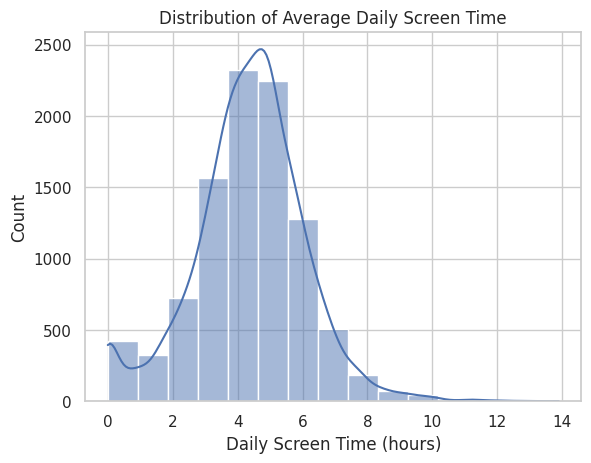

In [406]:
sns.histplot(df["Avg_Daily_Screen_Time_hr"], bins=15, kde=True)
plt.title("Distribution of Average Daily Screen Time")
plt.xlabel("Daily Screen Time (hours)")
plt.ylabel("Count")
plt.show()

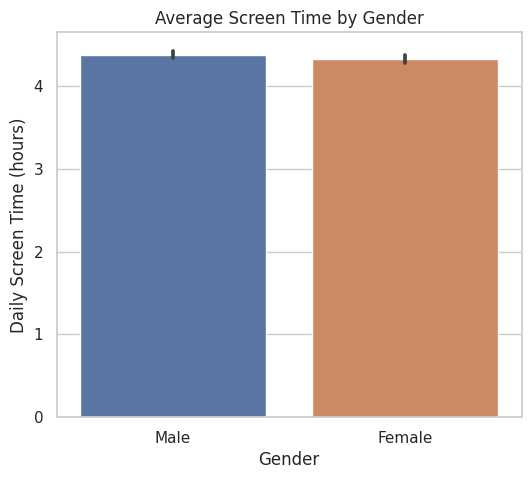

In [407]:
plt.figure(figsize=(6,5))
sns.barplot(x="Gender", y="Avg_Daily_Screen_Time_hr", data=df, estimator="mean")
plt.title("Average Screen Time by Gender")
plt.ylabel("Daily Screen Time (hours)")
plt.show()

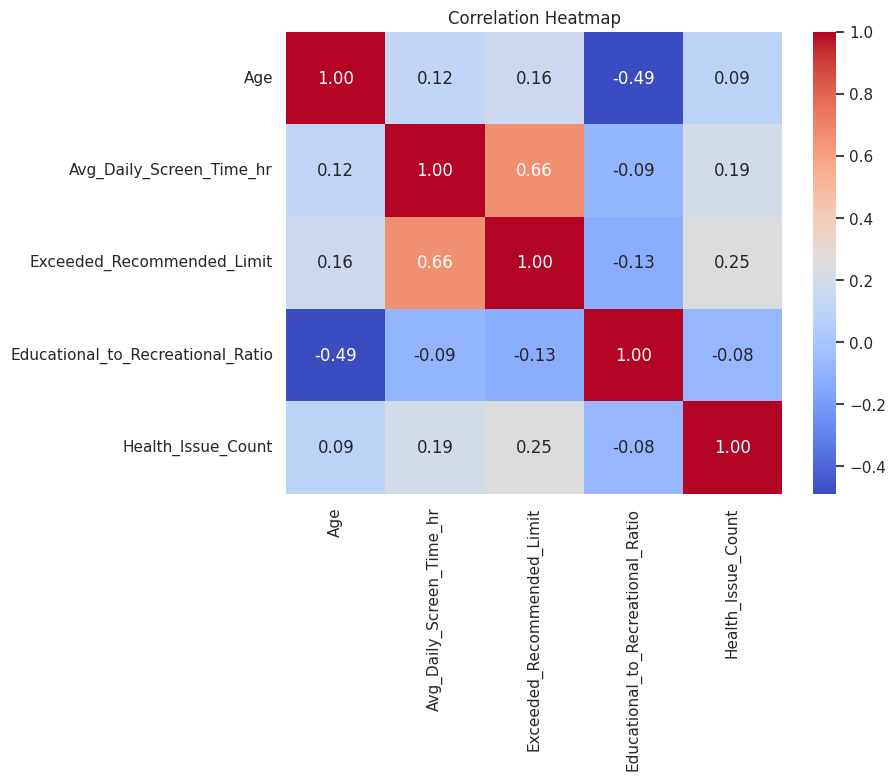

In [408]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()